In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
class1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
class2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)

In [21]:
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(100), np.ones(100)))
class1 = X[y==0]
class2 = X[y==1]

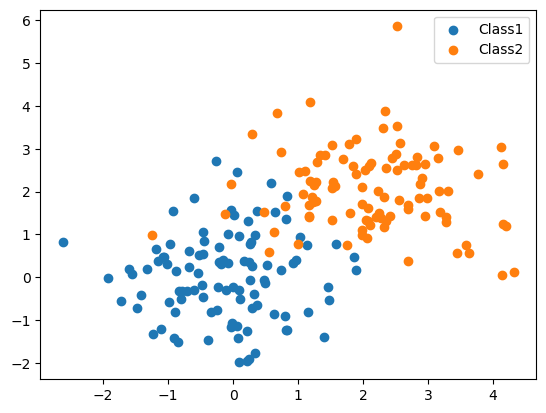

In [3]:
plt.scatter(class1[:, 0], class1[:, 1], label = 'Class1')
plt.scatter(class2[:,0], class2[:, 1], label = 'Class2')
plt.legend()
plt.show()

Mean of Class 1: [-0.11556425  0.03402232]
Mean of Class 2: [2.12824872 2.04348765]


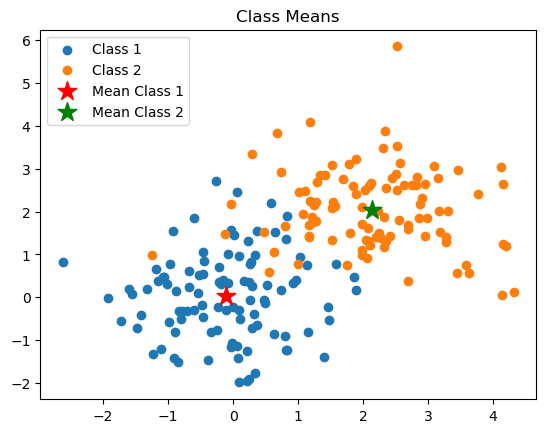

In [7]:
mean1 = np.mean(class1, axis = 0)
mean2 = np.mean(class2, axis = 0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)

# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [24]:
#compute the within class matrix
S_W = np.zeros((2, 2))
for c, mean in [(class1, mean1), (class2, mean2)]:
    W_c = np.zeros((2, 2))
    for sample in c:
        diff = (sample - mean).reshape(2, 1)
        W_c += np.dot(diff, diff.T)
    S_W += W_c
print("within class catter matrix")
print(S_W)

within class catter matrix
[[179.58654633  -5.30537   ]
 [ -5.30537    185.28344225]]


In [23]:
#compute the between class matrix
mean_overall = np.mean(X, axis = 0)
n1 = class1.shape[0]
n2 = class2.shape[0]
diff1 = (mean1-mean_overall).reshape(2, 1)
diff2 = (mean2 - mean_overall).reshape(2, 1)
S_b = 1/n1*np.dot(diff1, diff1.T)+1/n2*np.dot(diff2, diff2.T)
print("between class scatter matrix")
print(S_b)

between class scatter matrix
[[0.02517348 0.02254432]
 [0.02254432 0.02018975]]


In [36]:
#calculate eigen value and eigen vector
eigenvalue, eigenvector = np.linalg.eig(np.linalg.inv(S_W)*S_b)
#sort eigen value and get index in descending order
index = eigenvalue.argsort()[::-1]
vector = eigenvector[index[0]]
value = eigenvalue[index[0]]
print('largest eigen value: ', value)
print('corresponding vetor: ', vector)

largest eigen value:  0.00014070235144011956
corresponding vetor:  [ 0.99359908 -0.11296404]


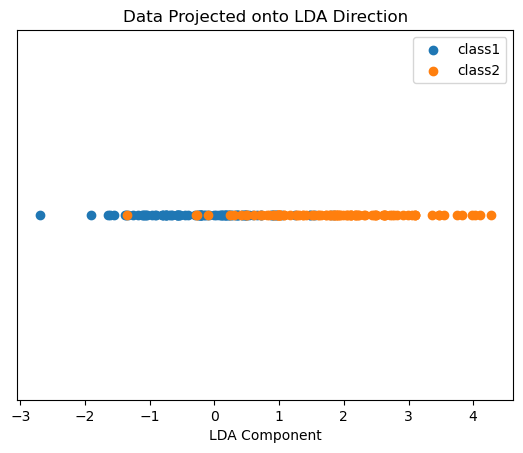

In [42]:
#project X to the vector
X_projected = X.dot(vector)
#visualise the projected data
plt.scatter(X_projected[y==0], np.zeros(n1), label = 'class1')
plt.scatter(X_projected[y==1], np.zeros(n2), label = 'class2')
plt.legend()
plt.title('Data Projected onto LDA Direction')
plt.xlabel('LDA Component')
plt.yticks([])
plt.show()

0


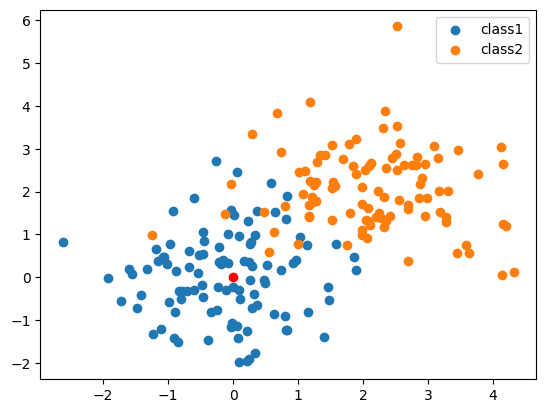

In [53]:
#classify new datapoint
def lda_classify(x, w, mean1, mean2):
    projection = w.dot(x)
    m1 = w.dot(mean1)
    m2 = w.dot(mean2)
    threshold = (m1 + m2)/2
    return 0 if projection < threshold else 1
test_point = [0, 0]
prediction = lda_classify(test_point, vector, mean1, mean2)
print(prediction)
#visualize
plt.scatter(class1[:, 0],class1[:,1], label = 'class1' )
plt.scatter(class2[:, 0],class2[:,1], label = 'class2' )
plt.scatter(test_point[0], test_point[1], color = 'r')
plt.legend()
# boundary_x = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
# boundary_y = -(vector[0] * boundary_x + (vector.dot(mean1 + mean2) / 2)) / vector[1]
# plt.plot(boundary_x, boundary_y, 'k--', label='Decision Boundary')

# plt.legend()
# plt.title('LDA Classification')
# plt.show()



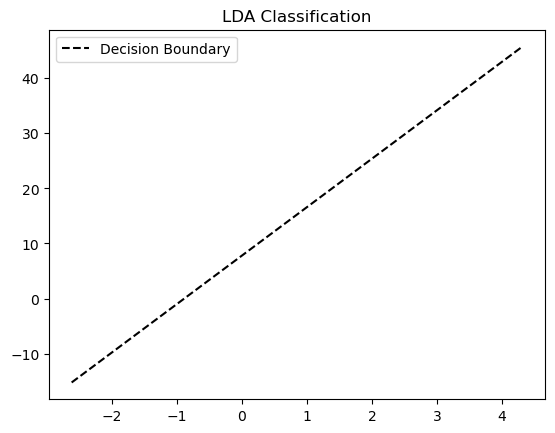

In [49]:
boundary_x = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
boundary_y = -(vector[0] * boundary_x + (vector.dot(mean1 + mean2) / 2)) / vector[1]
plt.plot(boundary_x, boundary_y, 'k--', label='Decision Boundary')

plt.legend()
plt.title('LDA Classification')
plt.show()


In [65]:
#validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train LDA on training data
class1_train = X_train[y_train==0]
class2_train = X_train[y_train==1]
mean1_train = np.mean(class1_train, axis = 0)
mean2_train = np.mean(class2_train, axis=0)
#calculate within class matrix
S_w_train = np.zeros((2, 2))
for mean, c in [(mean1_train, class1_train), (mean2_train, class2_train)]:
    W_c_train = np.zeros((2, 2))
    for sample in c:
        diff = (sample-mean).reshape(2, 1)
        W_c_train += np.dot(diff, diff.T)
    S_w_train += W_c_train
#calculate between class matrix
mean_overall_train = np.mean(X_train, axis = 0)
n1_train = class1_train.shape[0]
n2_train = class2_train.shape[0]
diff1_train =  (mean1_train-mean_overall_train).reshape(2, 1)
diff2_train = (mean2_train - mean_overall_train).reshape(2, 1)
S_b_train = 1/n1_train*np.dot(diff1_train, diff1_train.T)+1/n2_train*np.dot(diff2_train, diff2_train.T)
#calculate eigen value and vector
eigva, eigve = np.linalg.eig(np.linalg.inv(S_w_train)*S_b_train)
idx = eigva.argsort()
value = eigva[idx[0]]
vector = eigve[idx[0]]
# print(vector)
#function to predict
def lda(x, w, mean1, mean2):
    x_projected = w.dot(x)
    m1 = w.dot(mean1)
    m2 = w.dot(mean2)
    middle_point = 1/2*(m1+m2)
    return 0 if x_projected < middle_point else 1
y_pred = np.array([lda(x, vector, mean1_train, mean2_train) for x in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA accuracy is {accuracy: .2f}") 

LDA accuracy is  0.90


In [66]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [68]:
y_iris[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])